# Risk analysis - homogenous urban case

This notebook explains how to perform the simplest risk analysis.

## Creating project 

Create a project with **projectName** using the command line: 

<div class="alert alert-success" role="alert">    
    >> hera-project project create &lt project name &gt
</div>    

## Creating the wind field 

The wind field is created by 

### Getting the right template.

Get the template for the first time using: 
<div class="alert alert-success" role="alert">    
    >> hera-openFoam homogenousWindLogProfile templates get flatUrban
</div> 

The available templates are seen using 
<div class="alert alert-success" role="alert">    
    >> hera-openFoam homogenousWindLogProfile templates list
</div> 
    Note that you need to use the **name** columne to get the template. 

For the second time, you can just copy this file. 

### Configure the case 

For urban case, change the configuration of the execution in the parameter node of the JSON file. 
use `geany` to edit the JSON file. 
```javascript
"Uh": 4,
"lambdaP": 0.25,
"lambdaF": 0.25,
"Hc": 10,
```

Update the domain size in the `blockMesh.params`. 

### Execute the workflow 

The workflow is executed with the command 
<div class="alert alert-success" role="alert">    
    >> hera-openFoam homogenousWindLogProfile executeWorkflow &ltFile name&gt 
</div> 

Remember to include the `.json` for the workflow file name, for example "flatUrban_1.json". <br> <br>

<div class="alert alert-warning" role="alert">    
     <b>Note!</b> Running a simulation that is already in the DB does not indicate to the user that the database is different. <br>
    When you run it a second time, use the <b>--overwrite</b> term: <br> <br>
        >> hera-openFoam homogenousWindLogProfile executeWorkflow --overwrite
</div>

### Compute the flow field 

To compute the flow field enter the directory and rul using Allrun. That is: 
<div class="alert alert-success" role="alert">    
    >> cd &ltFile name&gt <br>
    >> ./Allrun
</div> 

<div class="alert alert-warning" role="alert">    
     <b>Note!</b> after every change of the parameters you need to <b>execute the workflow</b> and <b>compute the flow field</b> again!
</div>


### Adding new flow field to an existing project

To add a new wind field to an existing project with an **existing wind field**, all you need to do is copy the json file of the existing wind field.<br>
For example, if you want to add new wind field to project that alredy has flutUrban_1, just copy it:

<div class="alert alert-success" role="alert">    
    >> cp flatUrban_1 flatUrban_2
</div> 
and then change the parameters, execute the new workflow and compute the flow field.

## Create the dispersion

The dispersion is created using the template template. 

Get the template for the first time using: 
<div class="alert alert-success" role="alert">    
    >> hera-openFoam stochasticLagrangian templates get NeutralDispersion
</div> 

Now edit the file name and the parameters.

### Execute the dispersion
<div class="alert alert-success" role="alert">    
    >> hera-openFoam stochasticLagrangian executeWorkflow &ltFile name&gt
</div> 

Remember to include the `.json` for the workflow file name, for example "NeutralDispersion_1.json".<br> <br>

<div class="alert alert-warning" role="alert">    
     <b>Note!</b> Running a simulation that is already in the DB does not indicate to the user that the database is different. <br>
    When you run it a second time, use the <b>--overwrite</b> term: <br> <br>
    >> hera-openFoam stochasticLagrangian executeWorkflow &ltFile name&gt --overwrite
</div>

### Compute the dispersion 

To compute the dispersion enter the directory and rul using Allrun. That is: 
<div class="alert alert-success" role="alert">    
    >> cd &ltFile name&gt <br>
    >> ./Allrun
</div> 

<div class="alert alert-warning" role="alert">    
     <b>Note!</b> after every change of the parameters you need to <b>execute the dispersion</b> and <b>compute the dispersion</b> again!
</div>

### Adding new dispersion to an existing project

To add a new dispersion to an existing project with an **existing dispersion**, all you need to do is copy the json file of the existing dispersion.<br>
For example, if you want to add new dispersion to project that alredy has NeutralDispersion_1, just copy it:

<div class="alert alert-success" role="alert">    
    >> cp NeutralDispersion_1 NeutralDispersion_2
</div> 
and then change the parameters, execute the new dispersion and compute the dispersion.

## Getting the data 

Now we will analysis the data with the jupyter (or spyder) environment. 

To use the jupyter we need to start the server. 
<div class="alert alert-success" role="alert">    
<b>When the server is on the local machine: </b>
    
        >> jupyter-lab

<b>When the server is on the server: </b>
    
        >> jupyter-lab-server
</div> 

Then we open the browser and copy the line from the console text 
<div class="alert alert-warning" role="alert">    
     http://&lt IP &gt:8890/lab?token=c3ebf4738d7d174d5833df7a4df9dfba6dd592191962e04b
</div>
to the browser screen. 

Then, we can open a new notebook using the jupyter lab. 

In [1]:
from hera.utils.logging import initialize_logging,with_logger
from hera import toolkitHome
from hera.utils import *
tk = toolkitHome.getToolkit(toolkitName=toolkitHome.SIMULATIONS_OPENFOAM)

initialize_logging(
     with_logger("hera.simulations", handlers=['console'], level='INFO', propagate=False),
     with_logger("hera.simulations.openFoam.lagrangian.StochasticLagrangianSolver.StochasticLagrangianSolver_toolkitExtension.getCaseResults", handlers=['console'], level='DEBUG', propagate=False), # getCaseResults
    with_logger("hera.bin", handlers=['console'], level='ERROR', propagate=False),
    with_logger("hera.utils", handlers=['console'], level='ERROR', propagate=False),
)

Success


/home/sivan/Development/hera/hera/utils/freeCAD.py:10: UserWarning: freecad is not installed. some features will not work.
  warnings.warn("freecad is not installed. some features will not work.")


ValueError: Default project cannot use configuration

In [ ]:
dispersionCaseName = "NeutralDispersion_1"

<div class="alert alert-warning" role="alert">    
     Don't forget to change the disspersion file name above to which you are working on.
</div>


In [ ]:
doc = tk.getWorkflowDocumentFromDB(dispersionCaseName)

In [ ]:
doc[0].desc['parameters']['Parameters']['endOfInjection']

In [ ]:
doc[0].desc['parameters']['Parameters']['dispersionDuration']

In [ ]:
wf = tk.getHermesWorkflowFromDB(dispersionCaseName)

In [ ]:
wf.dispersionDuration

In [ ]:
originalFlowField = tk.stochasticLagrangian.getOriginalFlowDocument(wf)
dispersionFlowField = tk.stochasticLagrangian.getDispersionFlowDocument(wf)

In [6]:
dispersionField = tk.stochasticLagrangian.getDispersionFlowDocument(dispersionCaseName)

 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(277) Searching for NeutralDispersion_1 as a name of kind Simulations
 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(329) ... Found it as name
 INFO    : abstractLagrangianSolver.py/getDispersionFlowDocument(1056) Trying to retireve the document for flatUrban_1
 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(277) Searching for flatUrban_1 as a name of kind Simulations
 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(280) Searching for flatUrban_1 as a resource of kind Simulations.
 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(283) Searching for flatUrban_1 as a workflow group of kind Simulations.
 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(286) ... not found. Try to query as a json. 


In [7]:
originalFlow = tk.stochasticLagrangian.getOriginalFlowDocument(dispersionCaseName)

 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(277) Searching for NeutralDispersion_1 as a name of kind Simulations
 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(329) ... Found it as name
 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(277) Searching for flatUrban_1 as a name of kind Simulations
 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(329) ... Found it as name


In [5]:
#mesh = tk.getMesh(originalFlowField.getData())

In [6]:
# lims = tk.stochasticLagrangian.getOriginalFlowFieldExtent("NeutralDispersion_1")
# lims

**Note for the two lines below (LagrangianResults)**

 When the data is **small** you can load all of it at once using.
    
<div class="alert alert-danger" role="alert">
However, when it is large, this line might crush your jupyter server, so be carful.
</div>

In [11]:
LagrangianResults = tk.stochasticLagrangian.getCaseResults(dispersionCaseName,withReleaseTimes=True,overwrite=False)

 INFO    : abstractLagrangianSolver.py/getCaseResults(885) Getting stochastic results. Use cache? True ; Overwrite False
 INFO    : abstractLagrangianSolver.py/getCaseResults(898) Checking to see if the data NeutralDispersion_1 is cached in the DB
 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(277) Searching for NeutralDispersion_1 as a name of kind Cache
 INFO    : hermesWorkflowToolkit.py/getWorkflowDocumentFromDB(329) ... Found it as name
 INFO    : abstractLagrangianSolver.py/getCaseResults(912) Found NeutralDispersion_1 in the database. 
 INFO    : abstractLagrangianSolver.py/getCaseResults(925) Returning the cached data


In [14]:
LagrangianResults.compute()

,x,y,z,id,procId,globalID,U_x,U_y,U_z,releaseTime,age,mass
time,,,,,,,,,,,,
1.0,0.554461,-0.116942,4.552706,1.0,12.0,1.200000e+10,0.447597,0.000000,0.000000,0.001,0.999,0.0001
1.0,3.486677,-1.927777,5.490549,2.0,12.0,1.200000e+10,0.686200,0.000000,0.000000,0.002,0.998,0.0001
1.0,1.302899,-2.404188,4.825812,3.0,12.0,1.200000e+10,0.496588,0.000000,0.000000,0.003,0.997,0.0001
1.0,-1.925076,-4.105153,4.877135,4.0,12.0,1.200000e+10,0.506412,0.000000,0.000000,0.004,0.996,0.0001
1.0,0.235291,-0.691686,5.474329,5.0,12.0,1.200000e+10,0.692411,0.000000,0.000000,0.005,0.995,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...
367.0,906.817800,-22.767620,4.699069,8539.0,12.0,1.200001e+10,0.694955,-0.361148,-0.422584,8.539,358.461,0.0001
368.0,907.550100,-23.055600,4.117665,8539.0,12.0,1.200001e+10,0.678724,-0.287984,-0.581404,8.539,359.461,0.0001
369.0,908.168500,-23.424400,3.283261,8539.0,12.0,1.200001e+10,0.537583,-0.368796,-0.834404,8.539,360.461,0.0001


In [5]:
data = tk.stochasticLagrangian.analysis.calcConcentrationFieldFullMesh(dispersionCaseName,dxdydz=10*m,overwrite=True,reReadResults=False)

 INFO    : abstractLagrangianSolver.py/calcConcentrationFieldFullMesh(1363) Getting Concentration in a cartesian coordiantes
 INFO    : abstractLagrangianSolver.py/calcConcentrationFieldFullMesh(1383) Overwiting the existing data removing the cache from the DB and the disk
 INFO    : abstractLagrangianSolver.py/calcConcentrationFieldFullMesh(1386) Cache exist, but rewriting. Removing the old data in /ibdata/yehudaa/Projects/2024/testRA/cachedLagrangianData/NeutralDispersion_1_fullMeshCache_34/Concentrations*.nc (if exists)
 INFO    : abstractLagrangianSolver.py/calcConcentrationFieldFullMesh(1396) Removing the old DB record
 INFO    : abstractLagrangianSolver.py/calcConcentrationFieldFullMesh(1403) Adding to resource /ibdata/yehudaa/Projects/2024/testRA/cachedLagrangianData/NeutralDispersion_1_fullMeshCache_35/Concentrations*.nc
 INFO    : abstractLagrangianSolver.py/calcConcentrationFieldFullMesh(1410) Writing the cache of the results in /ibdata/yehudaa/Projects/2024/testRA/cachedLagr

ipdb>  c


/raid/software/python/pyenv/jammy/math2401/lib/python3.9/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


 <div class="alert alert-warning" role="alert">    
     After running the line above once, you need to change the <b>overwrite term</b> to <b>False</b> to prevent recalculation of all the data, and only change it again if you change anything in the run data.
</div>

In [6]:
data

<xarray.Dataset> Size: 12GB
Dimensions:  (datetime: 1200, x: 110, y: 110, z: 100)
Coordinates:
  * time     (datetime) float64 10kB 1.0 2.0 3.0 ... 1.198e+03 1.199e+03
  * x        (x) float64 880B -100.0 -90.0 -80.0 -70.0 ... 970.0 980.0 990.0
  * y        (y) float64 880B -100.0 -90.0 -80.0 -70.0 ... 970.0 980.0 990.0
  * z        (z) float64 800B 0.0 10.0 20.0 30.0 ... 960.0 970.0 980.0 990.0
Dimensions without coordinates: datetime
Data variables:
    C        (y, x, z, datetime) float64 12GB dask.array<chunksize=(110, 110, 100, 149), meta=np.ndarray>
Attributes:
    field:    {'C': 1.0 [kg/m3]}
    dt:       1.0s

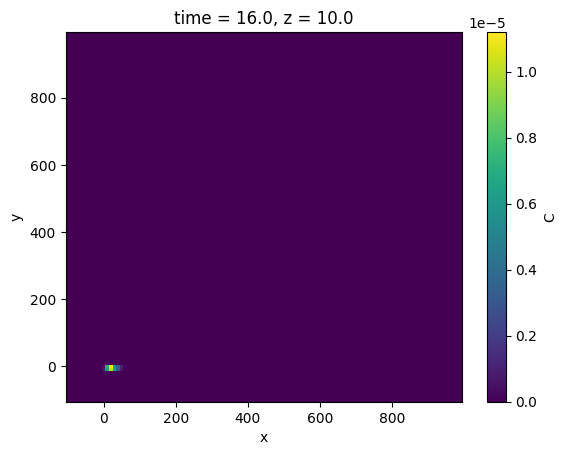

In [15]:
data['C'].sel(z=10).isel(datetime=15).compute().plot()

# Concentration Analysis


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Max Concentration

In [ ]:
meanData = data.resample(datetime = '20s').mean()

In [ ]:
maxcon_x = meanData.sel(z=0,y=0, method ='nearest')['C'].max(dim = 'datetime')
x_array = maxcon_x.squeeze().x
f = (maxcon_x.squeeze().values) * (10**6)

In [ ]:
f_ppm = f/14.1 # Divide f by the number corresponding to the material type.
fig, ax = plt.subplots(figsize=(9,9))
plt.title(f"Log scale max concentration (20s mean) along the plume centerline", fontsize = 15)
ax_ppm = ax.twinx()
ax.plot(x_array, f, color = 'g')
ax_ppm.plot(x_array, f_ppm, color = 'b')
ax.set_xlabel("X distance [m]")
ax.set_ylabel("Log scale concentration [$mg\cdot m^{-3}$]")
ax_ppm.set_ylabel("Log scale concentration [$PPM$]")
ax.set_yscale("log")
ax_ppm.set_yscale("log")
ax_ppm.tick_params(axis='y', labelsize = 20)
ax.tick_params(axis='x', labelsize = 20)
ax.tick_params(axis='y', labelsize = 20)
ax.set_xlim(-100, 1500)
ax.set_ylim(10**(-3), 10**3)
ax_ppm.set_ylim(10**(-3)/14.1, 10**3/14.1)
ax.minorticks_on()
ax.grid(which='major', color='#DDDDDD', linewidth=1.5)
ax.grid(which='minor', color='#DDDDDD', linewidth=0.5)

<div class="alert alert-warning" role="alert">    
This plot is <b>with</b> average over time. If you want <b>without</b> average over time, just change the first line to:
    
        >> maxcon_x = data.sel(z=0,y=0, method ='nearest')['C'].max(dim = 'datetime')

insted of:
    
        >> maxcon_x = meanData.sel(z=0,y=0, method ='nearest')['C'].max(dim = 'datetime')
</div> 